## **Informasi Mahasiswa**

Nama: Ahmad Faqih Al Ghiffary

NPM: 2108107010072

# **Jenis Dataset**

Saya mengambil dataset dari kaggle https://www.kaggle.com/datasets/uciml/iris?resource=download

Dataset berisikan data jenis-jenis Iris Flower

Di bawah ini merupakan kolom-kolom pada dataset
* Id
* SepalLengthCm : Panjang sepal bunga dalam centimeter
* SepalWidthCm  : Lebar sepal bunga dalam centimeter
* PetalLengthCm : Panjang petal bunga dalam centimeter
* PetalWidthCm  : Lebar petal bunga dalam centimeter
* Species       : Jenis species bunga



# **Studi Kasus**

Diberikan dataset yang berisikan data Bunga Iris. Pada tugas ini saya akan membuat model untuk memprediksi species bunga menggunakan Artificial Neural Network (ANN).

# **Preprocessing data**

Pertama kali import terlebih dahulu library-library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Kemudian akan dibaca dataset dan dilihat informasi dari dataset secara umum

In [2]:
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Selanjutnya akan dilihat banyak nilai *unique* pada setiap kolom, kita akan berfokus pada kolom *species* untuk menentukan banyak label yang akan diprediksikan

In [5]:
# Show unique value counts for each columns
for column in dataset.columns:
    unique_values_count = dataset[column].value_counts()
    print(f"Unique values count for column '{column}': {unique_values_count.size}\n")

Unique values count for column 'Id': 150

Unique values count for column 'SepalLengthCm': 35

Unique values count for column 'SepalWidthCm': 23

Unique values count for column 'PetalLengthCm': 43

Unique values count for column 'PetalWidthCm': 22

Unique values count for column 'Species': 3



In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Pada langkah ini terlebih dahulu akan di cek nilai null dan NaN terlebih dahulu

In [7]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Terlihat bahwa tidak ada nilai null dan NaN padaa dataset

# **Membangun Artificial Nerual Networks**

Menggunakan ANN, akan dibuat sebuah model untuk memprediksi label "Species" berdasarkan atribut-atributnya. Pertama kali dataset akan dipisah terlebih dahulu menjadi atribut-atribut (X) dan label (Y)

In [9]:
# Mengambil dataset
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

# Mengonversi data kategori jenis kelamin menjadi numerik
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


Kemudian dataset dipisah kembali manjadi *training* dan *testing* dataset

In [10]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Mengimpor library Keras dan turunannya
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
classifier = Sequential()

# Menambah input layer dan hidden layer pertama
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

# Menambah hidden layer kedua
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Menambah hidden layer ketiga
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Menambah output layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

# Meenjalankan ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting ANN ke training set
history = classifier.fit(X_train, y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test))

# Memprediksi hasil test set
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


2024-04-16 21:17:35.012896: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 21:17:35.013347: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:17:35.016018: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:17:35.047732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:17:35.880786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Epoch 1/200


/home/faqih/Kuliah/Semester 6/2108107010072_Pertemuan_11_ANN/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3888 - loss: 1.0987 - val_accuracy: 0.3556 - val_loss: 1.0989
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2804 - loss: 1.0989 - val_accuracy: 0.2444 - val_loss: 1.0992
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3892 - loss: 1.0983 - val_accuracy: 0.2444 - val_loss: 1.0997
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3632 - loss: 1.0979 - val_accuracy: 0.2444 - val_loss: 1.1001
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 1.0970 - val_accuracy: 0.2444 - val_loss: 1.1001
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3476 - loss: 1.0966 - val_accuracy: 0.2444 - val_loss: 1.0995
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3746 - loss: 1.0934 - val_accuracy: 0.2444 - val_loss: 1.0982
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3977 - loss: 1.0883 - val_accuracy: 0.2444 - val_loss: 1.

Pada iterasi terakhir, diperoleh nilai akurasi training sebesar 0.9682 dan akurasi testing 0.9778

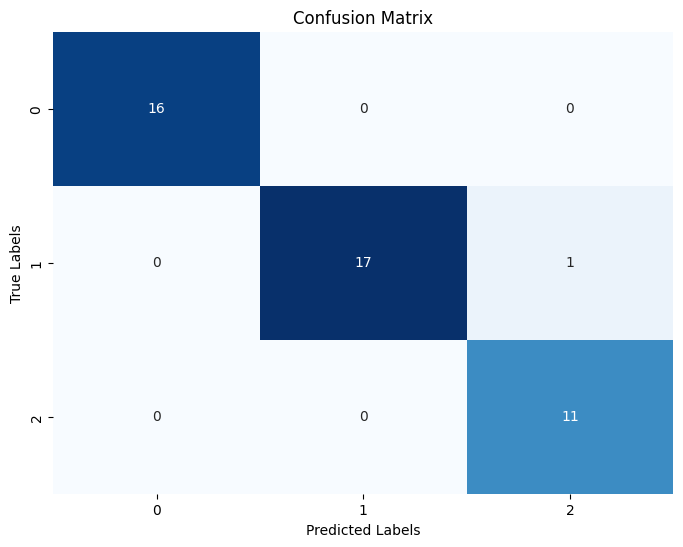

In [12]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Terlihat bahwa model sudah berjalan dengan baik, hanya terdapat 1 kesalahan pada True Label **1** yang diprediksi sebagai Label **2**

Terakhir akan ditampilkan grafik akurasi pada training dan testing

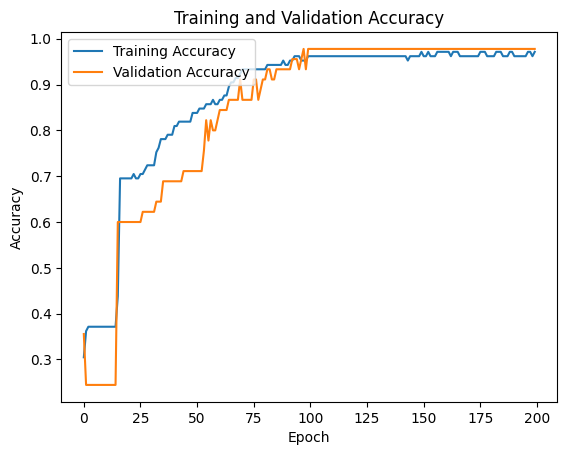

In [13]:
# Retrieve the training accuracy and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy per epoch
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()